## Customizing Colorbars

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

In [4]:
x = np.linspace(0,10,1000)
I = np.cos(x)* np.sin(x[:, np.newaxis])

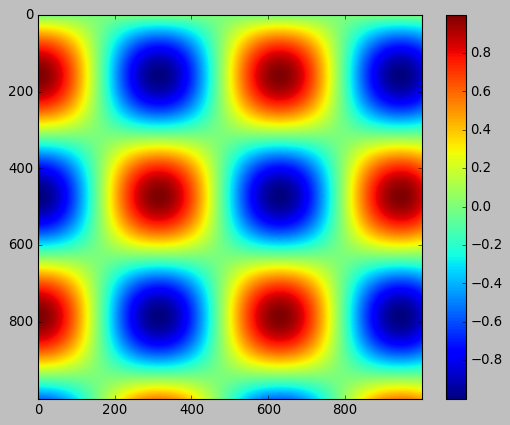

In [5]:
plt.imshow(I)
plt.colorbar()

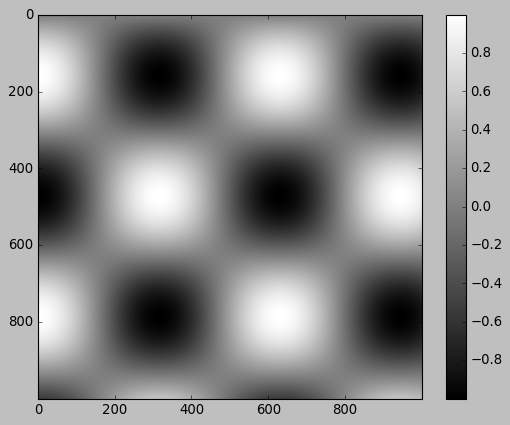

In [7]:
#colormap using cmap
plt.imshow(I, cmap='gray')
plt.colorbar()

In [8]:
#choosiing colormaps
from matplotlib.colors import LinearSegmentedColormap

In [9]:
def grayscaleCmp(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    #convert RGBA to perceived grayscale 
    RGBweight = [0.299,0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGBweight))
    colors[:,:3] = luminance[:, np.newaxis]
    
    return LinearSegmentedColormap.from_list(cmap.name + "_gray",colors, cmap.N)

In [19]:
def viewColormap(cmap):
    #plot a colormap with its grayscale equivalent 
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscaleCmp(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6,2),
                          subplot_kw = dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0,10,0,1])
    ax[1].imshow([grayscale], extent=[0,10,0,1])

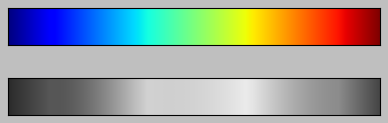

In [20]:
viewColormap('jet')

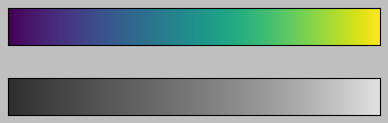

In [21]:
viewColormap('viridis')

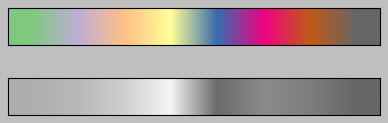

In [23]:
viewColormap('Accent')

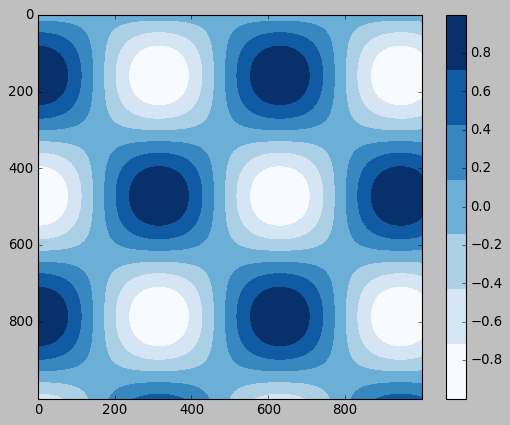

In [26]:
#discrete colorbars
plt.imshow(I, cmap=plt.cm.get_cmap('Blues',7))
plt.colorbar()

# Example Handwritten digits

In [27]:
#load image
from sklearn.datasets import load_digits

In [28]:
digits = load_digits(n_class = 6)

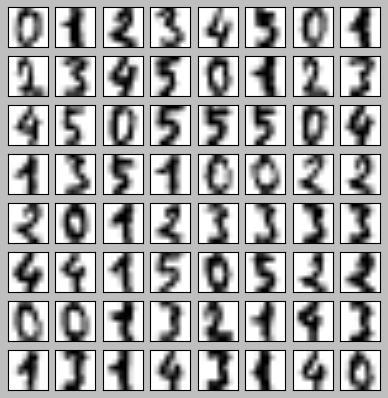

In [31]:
fig, ax = plt.subplots(8,8,figsize=(6,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])